# 6. Comparaciones v1 vs v3 clinica

## 6.1. Cargar archivos y tratamiento

In [1]:
import pandas as pd

# 1. Rutas originales
ruta_df_visita1_final = r"C:\Users\randy\Desktop\MC2\TFM\data\tablas_generadas\procesadas\procesadas_final\df_visita1_final.csv"
ruta_df_visita3_final = r"C:\Users\randy\Desktop\MC2\TFM\data\tablas_generadas\procesadas\procesadas_final\df_visita3_final.csv"
ruta_microbiota_CLR_clusters = r"C:\Users\randy\Desktop\MC2\TFM\data\tablas_generadas\procesadas\procesadas_microbiota\microbiota_CLR_clusters.csv"
ruta_df_visita4_final = r"C:\Users\randy\Desktop\MC2\TFM\data\tablas_generadas\procesadas\procesadas_final\df_visita4_final.csv"

# 2. Carga de DataFrames manteniendo sus nombres
df_visita1_final = pd.read_csv(ruta_df_visita1_final)
df_visita3_final = pd.read_csv(ruta_df_visita3_final)
microbiota_CLR_clusters = pd.read_csv(ruta_microbiota_CLR_clusters)
df_visita4_final = pd.read_csv(ruta_df_visita4_final)

# 3. Confirmación
print("✔️ df_visita1_final:", df_visita1_final.shape)
print("✔️ df_visita3_final:", df_visita3_final.shape)
print("✔️ microbiota_CLR_clusters:", microbiota_CLR_clusters.shape)
print("✔️ df_visita4_final:", df_visita4_final.shape)
microbiota_CLR_clusters


✔️ df_visita1_final: (297, 95)
✔️ df_visita3_final: (314, 97)
✔️ microbiota_CLR_clusters: (297, 241)
✔️ df_visita4_final: (314, 152)


,Unnamed: 0,d__Bacteria; p__Bacteroidota; c__Bacteroidia; o__Bacteroidales; f__Bacteroidaceae; g__Phocaeicola; s__Phocaeicola_vulgatus,d__Bacteria; p__Bacteroidota; c__Bacteroidia; o__Bacteroidales; f__Bacteroidaceae; g__Phocaeicola; s__Phocaeicola_dorei,d__Bacteria; p__Bacteroidota; c__Bacteroidia; o__Bacteroidales; f__Bacteroidaceae; g__Phocaeicola; s__Phocaeicola_coprocola,d__Bacteria; p__Bacteroidota; c__Bacteroidia; o__Bacteroidales; f__Bacteroidaceae; g__Bacteroides; s__Bacteroides_uniformis,d__Bacteria; p__Bacteroidota; c__Bacteroidia; o__Bacteroidales; f__Bacteroidaceae; g__Phocaeicola; s__Phocaeicola_plebeius,d__Bacteria; p__Bacteroidota; c__Bacteroidia; o__Bacteroidales; f__Rikenellaceae; g__Alistipes; s__Alistipes_putredinis,d__Bacteria; p__Bacteroidota; c__Bacteroidia; o__Bacteroidales; f__Tannerellaceae; g__Parabacteroides; s__Parabacteroides_merdae,d__Bacteria; p__Bacteroidota; c__Bacteroidia; o__Bacteroidales; f__Bacteroidaceae; g__Prevotella; s__Prevotella_copri,d__Bacteria; p__Firmicutes; c__Clostridia; o__Oscillospirales; f__Ruminococcaceae; g__Faecalibacterium; s__Faecalibacterium_prausnitzii,...,d__Bacteria; p__Firmicutes; c__Clostridia; o__Oscillospirales; f__Ruminococcaceae; g__Anaerotruncus; s__Anaerotruncus_massiliensis,d__Bacteria; p__Firmicutes; c__Bacilli; o__Lactobacillales; f__Aerococcaceae; g__Granulicatella; s__Granulicatella_adiacens,d__Bacteria; p__Firmicutes; c__Clostridia; o__Oscillospirales; f__Oscillospiraceae; g__Enterenecus,d__Bacteria; p__Firmicutes; c__Clostridia; o__Lachnospirales; f__Lachnospiraceae; g__Ventrisoma,d__Bacteria; p__Firmicutes; c__Clostridia; o__Lachnospirales; f__Lachnospiraceae; g__Coprococcus,d__Bacteria; p__Firmicutes; c__Clostridia; o__Oscillospirales; f__Acutalibacteraceae; g__Hydrogeniiclostridium,d__Bacteria; p__Firmicutes; c__Clostridia; o__Oscillospirales; f__Ruminococcaceae; g__Anaerotruncus; s__Anaerotruncus_sp003612625,d__Bacteria; p__Patescibacteria; c__Saccharimonadia; o__Saccharimonadales; f__Nanosynbacteraceae; g__Nanosynbacter,d__Bacteria; p__Firmicutes; c__Clostridia; o__Oscillospirales; f__Ruminococcaceae; g__Acetanaerobacterium; s__Acetanaerobacterium_elongatum,cluster
0,S001,2.823663,6.671347,6.775692,-2.166769,-2.166769,1.298967,6.070445,-2.166769,4.932432,...,-2.166769,-2.166769,-2.166769,-2.166769,-2.166769,-2.166769,-2.166769,0.231126,-2.166769,1
1,S002,6.787194,2.546814,-1.783919,3.713249,-1.783919,5.147553,4.284507,7.847169,3.322027,...,-1.783919,-1.783919,0.295523,-1.783919,-1.783919,-1.783919,-1.783919,-1.783919,-1.783919,0
2,S003,-0.815333,-0.815333,8.378776,-0.815333,8.421454,-0.815333,7.204937,-0.815333,3.173651,...,-0.815333,-0.815333,-0.815333,-0.815333,-0.815333,-0.815333,-0.815333,-0.815333,-0.815333,1
3,S004,6.312904,4.757185,-3.396453,5.198442,-3.396453,5.269161,5.460066,-3.396453,3.141687,...,-3.396453,-3.396453,0.004745,-1.093867,-1.604693,-1.317011,-3.396453,-2.010158,-3.396453,0
4,S006,5.063829,4.406641,0.718497,2.851619,-2.807863,-2.807863,4.550330,0.450233,4.521230,...,-0.861953,0.559432,-2.807863,-2.807863,0.370190,-2.807863,-2.807863,-2.807863,-0.610639,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,S563,9.849590,-1.007407,-1.007407,7.179058,-1.007407,-1.007407,-1.007407,-1.007407,-1.007407,...,-1.007407,1.295178,-1.007407,-1.007407,-1.007407,-1.007407,-1.007407,1.557543,-1.007407,1
293,S564,6.217724,3.357508,-2.836897,3.000833,0.421199,4.263954,4.795988,-2.836897,4.908538,...,1.133394,-0.271948,-2.836897,-0.271948,0.053474,0.800689,-2.836897,-0.757456,-2.836897,1
294,S565,5.334716,5.925814,5.143125,2.527617,5.775725,5.734284,4.773573,6.557773,5.180226,...,-1.961019,-1.961019,0.236206,-1.961019,-1.961019,-1.961019,-1.961019,-1.961019,-1.961019,1
295,S566,5.765611,-2.834083,-2.834083,5.654093,-2.834083,6.101557,4.947890,0.384793,4.250981,...,-2.834083,-2.834083,-2.834083,-2.834083,-2.834083,-0.269134,-2.834083,-2.834083,-2.834083,0


### 1.1 Df visita 1

##### Eliminar columnas que no sirven

In [2]:
columnas_a_eliminar_v1 = [
    'visita0', 'nivelestudios', 'situacionlaboral', 'horariolaboral', 'dislipemia',
    'hta', 'enftiroideas', 'hipotiroidismo', 'hipertiroidismo', 'ecv', 'acv',
    'enfdigestivas', 'higadograso', 'enfrespiratorias', 'enfrenales', 'depresion',
    'ansiedad', 'compalimentario', 'otrasenfpsiquia', 'tratahormonal', 'tumormaligno',
    'pesoembarazos', 'pad0_1', 'pas0_1', 'pad0_2', 'pas0_2', 'peso0', 'altura0',
    'BMI_0', 'dettratafarmaco', 'detsuplementnut', 'dejarfumar', 'cigarrillosdia',
    'cantalcohol', 'estadosalud', 'alergiainto', 'detalergiainto', 'mettotal_V0'
]



In [3]:
# Eliminar columnas indicadas de df_visita1_final
df_visita1_final = df_visita1_final.drop(columns=columnas_a_eliminar_v1, errors='ignore')

print("✔️ Columnas eliminadas de df_visita1_final. Dimensiones actuales:", df_visita1_final.shape)


✔️ Columnas eliminadas de df_visita1_final. Dimensiones actuales: (297, 57)


##### Convertir columnas categoricas a numericas

In [4]:
from datetime import datetime

# 1. Asegurarse de que ambas columnas estén en formato datetime
df_visita1_final['fechanac'] = pd.to_datetime(df_visita1_final['fechanac'], errors='coerce')
df_visita1_final['visita1'] = pd.to_datetime(df_visita1_final['visita1'], errors='coerce')

# 2. Calcular edad actual
hoy = pd.to_datetime(datetime.today())
df_visita1_final['edad'] = df_visita1_final['fechanac'].apply(
    lambda x: (hoy - x).days / 365.25 if pd.notnull(x) else None
)
df_visita1_final['edad'] = df_visita1_final['edad'].round(1)

# 3. Calcular días desde la visita 1 hasta hoy
df_visita1_final['dias_desde_visita1'] = df_visita1_final['visita1'].apply(
    lambda x: (hoy - x).days if pd.notnull(x) else None
)

print("✔️ Columna 'edad' creada desde 'fechanac'")
print("✔️ Columna 'dias_desde_visita1' creada desde 'visita1'")



✔️ Columna 'edad' creada desde 'fechanac'
✔️ Columna 'dias_desde_visita1' creada desde 'visita1'


In [5]:
# Eliminar columnas innecesarias
df_visita1_final = df_visita1_final.drop(columns=['fechanac', 'visita1', 'iniciodieta'], errors='ignore')

print("✔️ Columnas 'fechanac' 'inicio_dieta' y 'visita1' eliminadas.")


✔️ Columnas 'fechanac' 'inicio_dieta' y 'visita1' eliminadas.


In [6]:
# Detectar columnas categóricas automáticamente
columnas_categoricas = df_visita1_final.select_dtypes(include=['object', 'category']).columns.tolist()

print("🧩 Columnas categóricas encontradas:")
for col in columnas_categoricas:
    print(f"- {col} ({df_visita1_final[col].nunique()} categorías únicas)")


🧩 Columnas categóricas encontradas:
- sexo (2 categorías únicas)
- madobesidad (2 categorías únicas)
- maddiabetes (2 categorías únicas)
- maddislipemia (2 categorías únicas)
- madhipertension (2 categorías únicas)
- madenftiroideas (2 categorías únicas)
- madecv (2 categorías únicas)
- madacv (2 categorías únicas)
- madtumormaligno (2 categorías únicas)
- padobesidad (2 categorías únicas)
- paddiabetes (2 categorías únicas)
- paddislipemia (2 categorías únicas)
- padhipertension (2 categorías únicas)
- padenftiroideas (2 categorías únicas)
- padecv (2 categorías únicas)
- padacv (2 categorías únicas)
- padtumormaligno (2 categorías únicas)
- diabetes (3 categorías únicas)
- hipercoles (3 categorías únicas)
- hipertrigli (2 categorías únicas)
- hdlbajo (1 categorías únicas)
- ldlalto (2 categorías únicas)
- tratafarmaco (2 categorías únicas)
- suplementnut (2 categorías únicas)
- fumar (3 categorías únicas)
- habitoalcohol (2 categorías únicas)
- dieta (2 categorías únicas)


In [7]:
# 1. Eliminar columna con solo una categoría
df_visita1_final = df_visita1_final.drop(columns=['hdlbajo'], errors='ignore')

# 2. Columnas a codificar (todas excepto la que eliminamos)
columnas_a_codificar = [
    'sexo', 'madobesidad', 'maddiabetes', 'maddislipemia', 'madhipertension', 'madenftiroideas',
    'madecv', 'madacv', 'madtumormaligno', 'padobesidad', 'paddiabetes', 'paddislipemia',
    'padhipertension', 'padenftiroideas', 'padecv', 'padacv', 'padtumormaligno', 'diabetes',
    'hipercoles', 'hipertrigli', 'ldlalto', 'tratafarmaco', 'suplementnut', 'fumar',
    'habitoalcohol', 'dieta'
]

# 3. Aplicar codificación: convertimos texto en números
for col in columnas_a_codificar:
    df_visita1_final[col] = df_visita1_final[col].astype('category').cat.codes

print("✔️ Codificación aplicada a columnas categóricas.")


✔️ Codificación aplicada a columnas categóricas.


In [8]:
# 3. Confirmación
print("✔️ df_visita1_final:", df_visita1_final.shape)

✔️ df_visita1_final: (297, 55)


### 1.2 Df visita 3

#### Eliminar columnas que no sirven

In [9]:
columnas_a_eliminar_v3 = [
    'visita0', 'nivelestudios', 'situacionlaboral', 'horariolaboral', 'dislipemia',
    'hta', 'enftiroideas', 'hipotiroidismo', 'hipertiroidismo', 'ecv', 'acv',
    'enfdigestivas', 'higadograso', 'enfrespiratorias', 'enfrenales', 'depresion',
    'ansiedad', 'compalimentario', 'otrasenfpsiquia', 'tratahormonal', 'tumormaligno',
    'pesoembarazos', 'pad0_1', 'pas0_1', 'pad0_2', 'pas0_2', 'peso0', 'altura0',
    'BMI_0', 'dettratafarmaco', 'detsuplementnut', 'dejarfumar', 'cigarrillosdia',
    'cantalcohol', 'estadosalud', 'alergiainto', 'detalergiainto', 'mettotal_V0'
]

In [10]:
# Eliminar columnas indicadas de df_visita3_final
df_visita3_final = df_visita3_final.drop(columns=columnas_a_eliminar_v3, errors='ignore')

print("✔️ Columnas eliminadas de df_visita3_final. Dimensiones actuales:", df_visita3_final.shape)

✔️ Columnas eliminadas de df_visita3_final. Dimensiones actuales: (314, 59)


#### Convertir columnas categoricas a numericas

In [11]:
from datetime import datetime

# 1. Asegurarse de que ambas columnas estén en formato datetime
df_visita3_final['fechanac'] = pd.to_datetime(df_visita3_final['fechanac'], errors='coerce')
df_visita3_final['visita3'] = pd.to_datetime(df_visita3_final['visita3'], errors='coerce')

# 2. Calcular edad actual
hoy = pd.to_datetime(datetime.today())
df_visita3_final['edad'] = df_visita3_final['fechanac'].apply(
    lambda x: (hoy - x).days / 365.25 if pd.notnull(x) else None
)
df_visita3_final['edad'] = df_visita3_final['edad'].round(1)

# 3. Calcular días desde la visita 3 hasta hoy
df_visita3_final['dias_desde_visita3'] = df_visita3_final['visita3'].apply(
    lambda x: (hoy - x).days if pd.notnull(x) else None
)

print("✔️ Columna 'edad' creada desde 'fechanac'")
print("✔️ Columna 'dias_desde_visita3' creada desde 'visita3'")


✔️ Columna 'edad' creada desde 'fechanac'
✔️ Columna 'dias_desde_visita3' creada desde 'visita3'


In [12]:
# Eliminar columnas innecesarias
df_visita3_final = df_visita3_final.drop(columns=['fechanac', 'visita3', 'iniciodieta'], errors='ignore')

print("✔️ Columnas 'fechanac', 'iniciodieta' y 'visita3' eliminadas de df_visita3_final.")


✔️ Columnas 'fechanac', 'iniciodieta' y 'visita3' eliminadas de df_visita3_final.


In [13]:
# Detectar columnas categóricas automáticamente
columnas_categoricas_v3 = df_visita3_final.select_dtypes(include=['object', 'category']).columns.tolist()

print("🧩 Columnas categóricas encontradas en df_visita3_final:")
for col in columnas_categoricas_v3:
    print(f"- {col} ({df_visita3_final[col].nunique()} categorías únicas)")


🧩 Columnas categóricas encontradas en df_visita3_final:
- sexo (2 categorías únicas)
- madobesidad (2 categorías únicas)
- maddiabetes (2 categorías únicas)
- maddislipemia (2 categorías únicas)
- madhipertension (2 categorías únicas)
- madenftiroideas (2 categorías únicas)
- madecv (2 categorías únicas)
- madacv (2 categorías únicas)
- madtumormaligno (2 categorías únicas)
- padobesidad (2 categorías únicas)
- paddiabetes (2 categorías únicas)
- paddislipemia (2 categorías únicas)
- padhipertension (2 categorías únicas)
- padenftiroideas (2 categorías únicas)
- padecv (2 categorías únicas)
- padacv (2 categorías únicas)
- padtumormaligno (2 categorías únicas)
- diabetes (3 categorías únicas)
- hipercoles (3 categorías únicas)
- hipertrigli (2 categorías únicas)
- hdlbajo (1 categorías únicas)
- ldlalto (2 categorías únicas)
- tratafarmaco (2 categorías únicas)
- suplementnut (2 categorías únicas)
- fumar (3 categorías únicas)
- habitoalcohol (2 categorías únicas)
- dieta (2 categorías

In [14]:
# 1. Eliminar columna con solo una categoría
df_visita3_final = df_visita3_final.drop(columns=['hdlbajo'], errors='ignore')

# 2. Columnas categóricas a codificar
columnas_a_codificar_v3 = [
    'sexo', 'madobesidad', 'maddiabetes', 'maddislipemia', 'madhipertension', 'madenftiroideas',
    'madecv', 'madacv', 'madtumormaligno', 'padobesidad', 'paddiabetes', 'paddislipemia',
    'padhipertension', 'padenftiroideas', 'padecv', 'padacv', 'padtumormaligno', 'diabetes',
    'hipercoles', 'hipertrigli', 'ldlalto', 'tratafarmaco', 'suplementnut', 'fumar',
    'habitoalcohol', 'dieta'
]

# 3. Aplicar codificación
for col in columnas_a_codificar_v3:
    df_visita3_final[col] = df_visita3_final[col].astype('category').cat.codes

print("✔️ Codificación aplicada a columnas categóricas de df_visita3_final.")


✔️ Codificación aplicada a columnas categóricas de df_visita3_final.


In [15]:
# 3. Confirmación
print("✔️ df_visita3_final:", df_visita3_final.shape)

✔️ df_visita3_final: (314, 57)


### 1.3 Df visita 4

In [16]:
print("Columnas df_visita1_final:")
print(df_visita4_final.columns.tolist())

Columnas df_visita1_final:
['id', 'visita0', 'fechanac', 'sexo', 'nivelestudios', 'situacionlaboral', 'horariolaboral', 'numerohijos', 'madobesidad', 'maddiabetes', 'maddislipemia', 'madhipertension', 'madenftiroideas', 'madecv', 'madacv', 'madtumormaligno', 'padobesidad', 'paddiabetes', 'paddislipemia', 'padhipertension', 'padenftiroideas', 'padecv', 'padacv', 'padtumormaligno', 'diabetes', 'dislipemia', 'hipercoles', 'hipertrigli', 'hdlbajo', 'ldlalto', 'hta', 'enftiroideas', 'hipotiroidismo', 'hipertiroidismo', 'ecv', 'acv', 'enfdigestivas', 'higadograso', 'enfrespiratorias', 'enfrenales', 'depresion', 'ansiedad', 'compalimentario', 'otrasenfpsiquia', 'tratahormonal', 'tumormaligno', 'pesoembarazos', 'pad0_1', 'pas0_1', 'pad0_2', 'pas0_2', 'peso0', 'altura0', 'BMI_0', 'tratafarmaco', 'dettratafarmaco', 'suplementnut', 'detsuplementnut', 'fumar', 'dejarfumar', 'cigarrillosdia', 'habitoalcohol', 'cantalcohol', 'estadosalud', 'alergiainto', 'detalergiainto', 'mettotal_V0', 'iniciodieta

In [17]:
columnas_a_eliminar_v4 = [
    'visita0', 'fechanac', 'sexo', 'nivelestudios', 'situacionlaboral', 'horariolaboral',
    'numerohijos', 'madobesidad', 'maddiabetes', 'maddislipemia', 'madhipertension',
    'madenftiroideas', 'madecv', 'madacv', 'madtumormaligno', 'padobesidad', 'paddiabetes',
    'paddislipemia', 'padhipertension', 'padenftiroideas', 'padecv', 'padacv',
    'padtumormaligno', 'diabetes', 'dislipemia', 'hipercoles', 'hipertrigli', 'hdlbajo',
    'ldlalto', 'hta', 'enftiroideas', 'hipotiroidismo', 'hipertiroidismo', 'ecv', 'acv',
    'enfdigestivas', 'higadograso', 'enfrespiratorias', 'enfrenales', 'depresion',
    'ansiedad', 'compalimentario', 'otrasenfpsiquia', 'tratahormonal', 'tumormaligno',
    'pesoembarazos', 'pad0_1', 'pas0_1', 'pad0_2', 'pas0_2', 'peso0', 'altura0', 'BMI_0',
    'tratafarmaco', 'dettratafarmaco', 'suplementnut', 'detsuplementnut', 'fumar',
    'dejarfumar', 'cigarrillosdia', 'habitoalcohol', 'cantalcohol', 'estadosalud',
    'alergiainto', 'detalergiainto', 'mettotal_V0', 'iniciodieta', 'dieta', 'visita4',
    'peso4', 'BMI_4', 'cintura4_1', 'cintura4_2', 'cintura4_3', 'cadera4_1', 'cadera4_2',
    'cadera4_3', 'masagrasa4', 'masamagra4', 'aguacorporal4', 'pas4_1', 'pad4_1',
    'pas4_2', 'pad4_2'
]
df_visita4_final = df_visita4_final.drop(columns=columnas_a_eliminar_v4, errors='ignore')

print("✔️ Columnas de Visita 0 y Visita 4 eliminadas de df_visita4_final.")


✔️ Columnas de Visita 0 y Visita 4 eliminadas de df_visita4_final.


## 6.2. Obtener las tablas correspondientes a v1 y v3 pero con la bioquimica

In [18]:
# 1. Seleccionar columnas que terminan en '1' y mantener 'id'
bioquimica_v1 = df_visita4_final[[col for col in df_visita4_final.columns if col.endswith('1') or col == 'id']]

# 2. Seleccionar columnas que terminan en '3' y mantener 'id'
bioquimica_v3 = df_visita4_final[[col for col in df_visita4_final.columns if col.endswith('3') or col == 'id']]

# 3. Unir bioquímica V1 a df_visita1_final
df_visita1_final = pd.merge(df_visita1_final, bioquimica_v1, on='id', how='left')

# 4. Unir bioquímica V3 a df_visita3_final
df_visita3_final = pd.merge(df_visita3_final, bioquimica_v3, on='id', how='left')

print("✔️ Bioquímica V1 unida a df_visita1_final")
print("✔️ Bioquímica V3 unida a df_visita3_final")
df_visita3_final

✔️ Bioquímica V1 unida a df_visita1_final
✔️ Bioquímica V3 unida a df_visita3_final


,id,sexo,numerohijos,madobesidad,maddiabetes,maddislipemia,madhipertension,madenftiroideas,madecv,madacv,...,insulina_v3,leptina_v3,crp_v3,tsh_v3,tnf_v3,homa_ir3,gluc_ins3,lep_adip3,trighdl3,tyg3
0,1,1,3.0,0,0,0,0,0,0,0,...,6.0,24.0,2.0,1.0,2.0,1.0,19.0,2.0,1.0,1.0
1,2,0,0.0,0,0,0,0,0,0,0,...,8.0,9.0,2.0,1.0,2.0,2.0,12.0,1.0,2.0,1.0
2,3,0,2.0,1,1,0,0,0,0,0,...,3.0,4.0,6.0,1.0,1.0,1.0,35.0,1.0,1.0,1.0
3,4,0,3.0,0,0,0,0,1,0,0,...,8.0,5.0,10.0,1.0,2.0,2.0,11.0,1.0,3.0,2.0
4,5,1,2.0,1,0,1,1,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,314,0,1.0,1,0,0,1,0,0,0,...,2.0,1.0,4.0,1.0,1.0,0.0,38.0,0.0,1.0,1.0
310,315,1,0.0,0,0,0,0,1,0,0,...,13.0,118.0,10.0,2.0,1.0,3.0,6.0,13.0,4.0,3.0
311,316,0,3.0,0,1,0,1,0,0,0,...,4.0,14.0,1.0,3.0,1.0,1.0,29.0,1.0,1.0,0.0
312,317,1,2.0,0,0,1,0,0,0,0,...,6.0,51.0,1.0,2.0,1.0,1.0,16.0,4.0,2.0,1.0


In [19]:
from sklearn.preprocessing import LabelEncoder

# Eliminar cronotipo en ambos
df_visita1_final = df_visita1_final.drop(columns=['cronotipo1'], errors='ignore')
df_visita3_final = df_visita3_final.drop(columns=['cronotipo3'], errors='ignore')

# Codificar dx_depresion_V1
if 'dx_depresion_V1' in df_visita1_final.columns:
    le_v1 = LabelEncoder()
    df_visita1_final['dx_depresion_V1'] = le_v1.fit_transform(df_visita1_final['dx_depresion_V1'].astype(str))

# Codificar dx_depresion_V3
if 'dx_depresion_V3' in df_visita3_final.columns:
    le_v3 = LabelEncoder()
    df_visita3_final['dx_depresion_V3'] = le_v3.fit_transform(df_visita3_final['dx_depresion_V3'].astype(str))

print("✔️ 'cronotipo' eliminado y 'dx_depresion' codificado con LabelEncoder.")


✔️ 'cronotipo' eliminado y 'dx_depresion' codificado con LabelEncoder.


## 6.3. Unir tablas de visitas + microbiotaCLR_clusters

### Sacar ID de microbiotaCLR_clusters

In [20]:
# Asignar nombre a la primera columna si no lo tenía (asumimos posición 0)
microbiota_CLR_clusters.rename(columns={microbiota_CLR_clusters.columns[0]: 'subject_code'}, inplace=True)

# Extraer el número y convertirlo a entero
microbiota_CLR_clusters['id'] = microbiota_CLR_clusters['subject_code'].str.extract(r'S(\d{3})')[0].astype(int)

print("✔️ Columna 'id' creada correctamente en microbiota_CLR_clusters.")


✔️ Columna 'id' creada correctamente en microbiota_CLR_clusters.


### Unir tablas mediante id

In [21]:
# 1. Unir con df_visita1_final
df_visita1_final = pd.merge(df_visita1_final, microbiota_CLR_clusters[['id', 'cluster']], on='id', how='left')

# 2. Unir con df_visita3_final
df_visita3_final = pd.merge(df_visita3_final, microbiota_CLR_clusters[['id', 'cluster']], on='id', how='left')

print("✔️ Columna 'cluster' unida a df_visita1_final y df_visita3_final correctamente.")


✔️ Columna 'cluster' unida a df_visita1_final y df_visita3_final correctamente.


In [22]:
# Renombrar DataFrames para mayor claridad
df_clinico_microbiota_v1 = df_visita1_final.copy()
df_clinico_microbiota_v3 = df_visita3_final.copy()

print("✔️ DataFrames renombrados a 'df_clinico_microbiota_v1' y 'df_clinico_microbiota_v3'")
df_clinico_microbiota_v1


✔️ DataFrames renombrados a 'df_clinico_microbiota_v1' y 'df_clinico_microbiota_v3'


,id,sexo,numerohijos,madobesidad,maddiabetes,maddislipemia,madhipertension,madenftiroideas,madecv,madacv,...,leptina_v1,crp_v1,tsh_v1,tnf_v1,homa_ir1,gluc_ins1,lep_adip1,trighdl1,tyg1,cluster
0,1,1,3.0,0,0,0,0,0,0,0,...,107.0,2.0,1.0,2.0,3.0,8.0,8.0,2.0,1.0,1.0
1,2,0,0.0,0,0,0,0,0,0,0,...,23.0,1.0,3.0,2.0,2.0,11.0,2.0,2.0,1.0,0.0
2,3,0,2.0,1,1,0,0,0,0,0,...,15.0,9.0,1.0,1.0,1.0,22.0,3.0,3.0,1.0,1.0
3,4,0,3.0,0,0,0,0,1,0,0,...,20.0,7.0,1.0,2.0,4.0,7.0,2.0,3.0,2.0,0.0
4,6,1,3.0,1,1,0,0,0,1,0,...,81.0,1.0,1.0,1.0,1.0,21.0,3.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,314,0,1.0,1,0,0,1,0,0,0,...,7.0,18.0,1.0,1.0,1.0,21.0,1.0,2.0,1.0,0.0
293,315,1,0.0,0,0,0,0,1,0,0,...,36.0,6.0,2.0,1.0,2.0,12.0,4.0,2.0,1.0,1.0
294,316,0,3.0,0,1,0,1,0,0,0,...,15.0,1.0,2.0,1.0,2.0,18.0,1.0,2.0,1.0,0.0
295,317,1,2.0,0,0,1,0,0,0,0,...,43.0,1.0,2.0,1.0,2.0,11.0,3.0,1.0,0.0,0.0


## 6.4 Comparar V1 entre clusters

In [ ]:
import pandas as pd
from scipy.stats import ks_2samp, ttest_ind, mannwhitneyu

# 1. Eliminar filas sin cluster
df_v1_clusters = df_clinico_microbiota_v1.dropna(subset=['cluster']).copy()
df_v1_clusters['cluster'] = df_v1_clusters['cluster'].astype(int)

# 2. Filtrar variables numéricas (excluyendo id y cluster)
variables = df_v1_clusters.select_dtypes(include='number').drop(columns=['id', 'cluster', 'dieta'], errors='ignore').columns.tolist()

# 3. Separar los grupos por cluster
grupo0 = df_v1_clusters[df_v1_clusters['cluster'] == 0]
grupo1 = df_v1_clusters[df_v1_clusters['cluster'] == 1]

# 4. Comparar cada variable
resultados = []

for var in variables:
    x0 = grupo0[var].dropna()
    x1 = grupo1[var].dropna()

    # Solo comparar si ambos grupos tienen datos
    if len(x0) > 0 and len(x1) > 0:
        ks_p = ks_2samp(x0, x1).pvalue
        if ks_p > 0.05:
            test_name = "t-test"
            p_value = ttest_ind(x0, x1, equal_var=False).pvalue
        else:
            test_name = "Mann-Whitney"
            p_value = mannwhitneyu(x0, x1, alternative='two-sided').pvalue

        resultados.append({
            'variable': var,
            'p_value': round(p_value, 5),
            'test': test_name,
            'media_cluster_0': round(x0.mean(), 2),
            'media_cluster_1': round(x1.mean(), 2)
        })

# 5. Crear DataFrame de resultados ordenado
df_resultados_v1 = pd.DataFrame(resultados).sort_values(by='p_value')

# Mostrar top 10
print("🎯 Top 10 variables con diferencia entre clusters:\n")
print(df_resultados_v1.head(10))
df_resultados_v1 

🎯 Top 10 variables con diferencia entre clusters:

          variable  p_value          test  media_cluster_0  media_cluster_1
64         suma_v1  0.00236  Mann-Whitney            57.70            54.33
51            edad  0.00837  Mann-Whitney            56.94            53.61
15          padecv  0.01470        t-test             0.09             0.20
10     padobesidad  0.07528        t-test             0.29             0.19
75          crp_v1  0.08442        t-test             3.16             2.40
82            tyg1  0.10184        t-test             1.03             1.11
11     paddiabetes  0.10760        t-test             0.20             0.12
65         wctyg_1  0.10815        t-test            12.34            12.09
55           hdlc1  0.13854        t-test            54.45            57.06
56  trigliceridos1  0.14591        t-test            92.30           100.48


,id,sexo,numerohijos,madobesidad,maddiabetes,maddislipemia,madhipertension,madenftiroideas,madecv,madacv,...,leptina_v1,crp_v1,tsh_v1,tnf_v1,homa_ir1,gluc_ins1,lep_adip1,trighdl1,tyg1,cluster
0,1,1,3.0,0,0,0,0,0,0,0,...,107.0,2.0,1.0,2.0,3.0,8.0,8.0,2.0,1.0,1.0
1,2,0,0.0,0,0,0,0,0,0,0,...,23.0,1.0,3.0,2.0,2.0,11.0,2.0,2.0,1.0,0.0
2,3,0,2.0,1,1,0,0,0,0,0,...,15.0,9.0,1.0,1.0,1.0,22.0,3.0,3.0,1.0,1.0
3,4,0,3.0,0,0,0,0,1,0,0,...,20.0,7.0,1.0,2.0,4.0,7.0,2.0,3.0,2.0,0.0
4,6,1,3.0,1,1,0,0,0,1,0,...,81.0,1.0,1.0,1.0,1.0,21.0,3.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,314,0,1.0,1,0,0,1,0,0,0,...,7.0,18.0,1.0,1.0,1.0,21.0,1.0,2.0,1.0,0.0
293,315,1,0.0,0,0,0,0,1,0,0,...,36.0,6.0,2.0,1.0,2.0,12.0,4.0,2.0,1.0,1.0
294,316,0,3.0,0,1,0,1,0,0,0,...,15.0,1.0,2.0,1.0,2.0,18.0,1.0,2.0,1.0,0.0
295,317,1,2.0,0,0,1,0,0,0,0,...,43.0,1.0,2.0,1.0,2.0,11.0,3.0,1.0,0.0,0.0


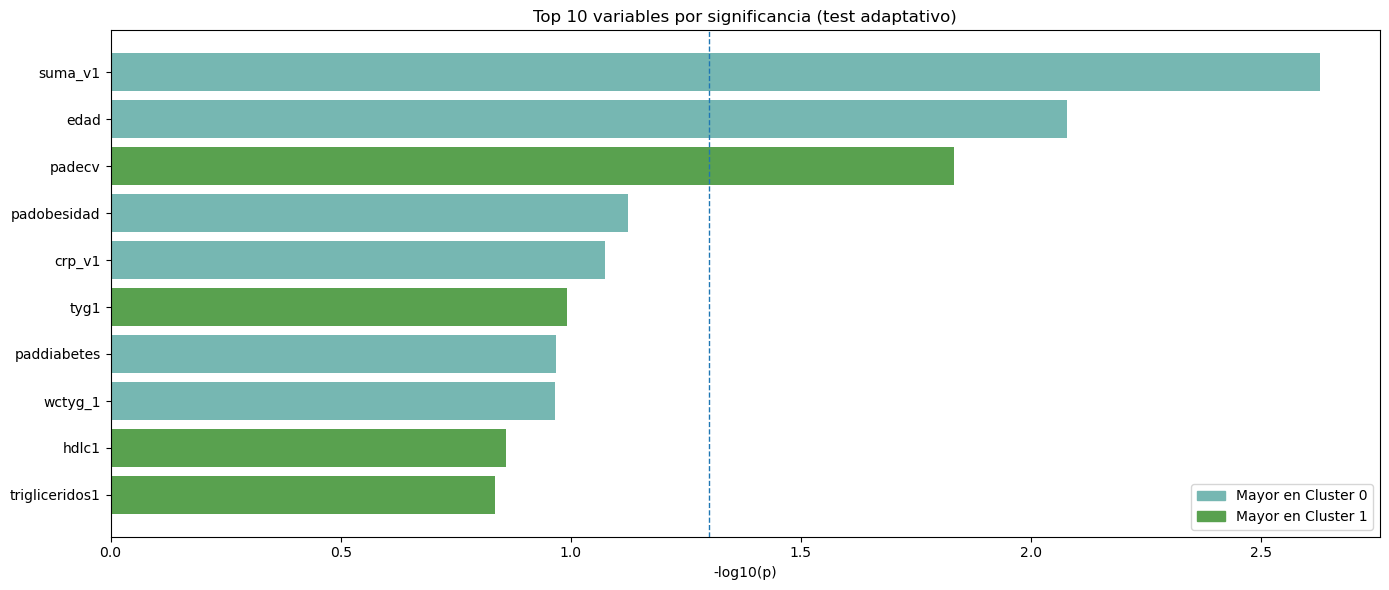

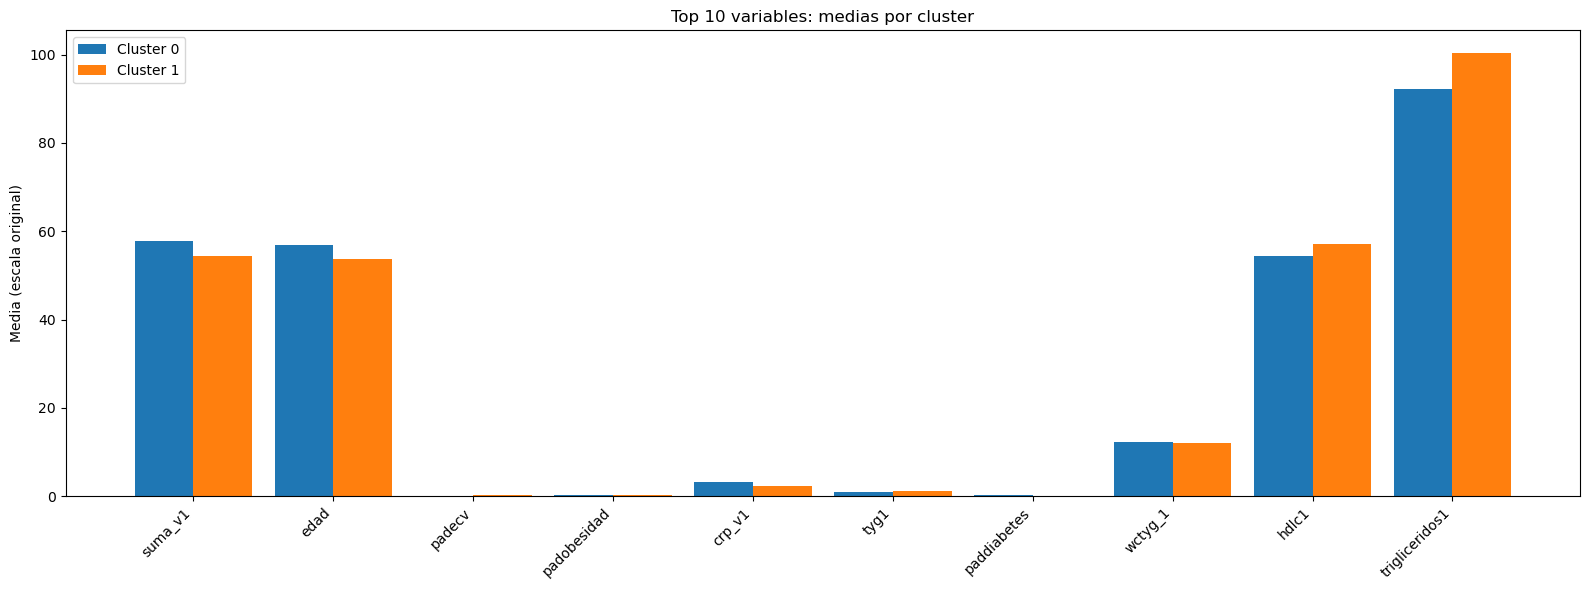

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# --- Preparar Top 10 ---
top10 = df_resultados_v1.head(10).copy()
top10["cluster_mas_alto"] = np.where(
    top10["media_cluster_1"] > top10["media_cluster_0"], "Cluster 1", "Cluster 0"
)

# --- Plot 1: -log10(p) por variable (color según cluster con mayor media) ---
plt.figure(figsize=(14, 6))
colors = top10["cluster_mas_alto"].map({"Cluster 0": "#76b7b2", "Cluster 1": "#59a14f"})
plt.barh(top10["variable"], -np.log10(top10["p_value"]), color=colors)
plt.axvline(-np.log10(0.05), linestyle="--", linewidth=1, label="p = 0.05")
plt.xlabel("-log10(p)")
plt.title("Top 10 variables por significancia (test adaptativo)")
plt.gca().invert_yaxis()
# leyenda manual
handles = [
    plt.Rectangle((0,0),1,1,color="#76b7b2",label="Mayor en Cluster 0"),
    plt.Rectangle((0,0),1,1,color="#59a14f",label="Mayor en Cluster 1"),
]
plt.legend(handles=handles, loc="lower right")
plt.tight_layout()
plt.show()

# --- Plot 2: Medias por cluster (barras agrupadas) ---
idx = np.arange(len(top10))
width = 0.42

plt.figure(figsize=(16, 6))
plt.bar(idx - width/2, top10["media_cluster_0"], width, label="Cluster 0")
plt.bar(idx + width/2, top10["media_cluster_1"], width, label="Cluster 1")
plt.xticks(idx, top10["variable"], rotation=45, ha="right")
plt.ylabel("Media (escala original)")
plt.title("Top 10 variables: medias por cluster")
plt.legend()
plt.tight_layout()
plt.show()

# (Opcional) Si las escalas son muy distintas, usa z-score por variable para el plot 2:
# from scipy.stats import zscore
# m0 = top10["media_cluster_0"].to_numpy()
# m1 = top10["media_cluster_1"].to_numpy()
# mm = np.vstack([m0, m1]).T
# mm_z = (mm - mm.mean(axis=1, keepdims=True)) / mm.std(axis=1, keepdims=True)
# plt.figure(figsize=(16,6))
# plt.bar(idx - width/2, mm_z[:,0], width, label="Cluster 0 (z-score)")
# plt.bar(idx + width/2, mm_z[:,1], width, label="Cluster 1 (z-score)")
# plt.xticks(idx, top10["variable"], rotation=45, ha="right")
# plt.ylabel("z-score (por variable)")
# plt.title("Top 10 variables: medias por cluster (normalizadas)")
# plt.legend(); plt.tight_layout(); plt.show()


In [24]:
ruta_resultados = r"C:\Users\randy\Desktop\MC2\TFM\data\tablas_generadas\procesadas\resultados\comparacion_clinica_v1_v3\resultados_comparacion_clusters_v1.csv"
df_resultados_v1.to_csv(ruta_resultados, index=False)

print(f"✔️ Resultados guardados en: {ruta_resultados}")


✔️ Resultados guardados en: C:\Users\randy\Desktop\MC2\TFM\data\tablas_generadas\procesadas\resultados\comparacion_clinica_v1_v3\resultados_comparacion_clusters_v1.csv


1. suma_v1 (p = 0.00236, Mann-Whitney)
Qué es: puntuación en el cuestionario de cronotipo (matutinidad-vespertinidad)

Media cluster 0: 57.7 → más matutinos

Media cluster 1: 54.33 → más vespertinos

Interpretación: Hay una diferencia significativa en los cronotipos entre clusters. Las personas del cluster 0 tienden a ser más matutinas que las del cluster 1.

🔬 Relevancia científica: Esto es coherente con literatura que vincula la microbiota con ritmos circadianos y metabolismo.

2. edad (p = 0.00829, Mann-Whitney)
Media cluster 0: 56.76 años

Media cluster 1: 53.43 años

Interpretación: Las personas del cluster 0 son significativamente mayores que las del cluster 1.

🔬 Esto también tiene sentido, ya que la microbiota se altera con la edad, y puede influir en la asignación a un cluster distinto.

3. padecv (p = 0.0147, t-test)
Qué es: presencia de enfermedad cardiovascular en el padre

Media cluster 0: 0.09

Media cluster 1: 0.2

Interpretación: El cluster 1 tiene mayor prevalencia de antecedentes familiares de enfermedad cardiovascular.

📈 Esto sugiere que este cluster podría estar más predispuesto genéticamente a alteraciones cardiometabólicas.

4. padobesidad (p = 0.07528, t-test)
Media cluster 0: 0.29

Media cluster 1: 0.19

Interpretación: Aunque no es estadísticamente significativa (p ≈ 0.075), parece haber más obesidad paterna en el cluster 0.

Podría indicar cierta predisposición familiar, pero necesitaría más datos o una muestra más grande para confirmarlo.

📌 CONCLUSIÓN
Estos resultados indican que los clusters de microbiota al inicio del estudio (V1):

Se asocian a diferencias fisiológicas y familiares reales

Cluster 0 → personas mayores, más matutinas, con menos antecedentes cardiovasculares

Cluster 1 → más jóvenes, más vespertinas, con mayor riesgo cardiovascular familiar

📘 Coherente con la hipótesis de que la microbiota se asocia con fenotipos metabólicos y cronobiológicos.

## 6.5 Análisis de cambios V3-V1

### Construir un nuevo df cambios

In [36]:
# Mostrar nombres de columnas de V1
print("🧾 Columnas en df_clinico_microbiota_v1:\n")
for col in df_clinico_microbiota_v1.columns:
    print(col)

# Mostrar nombres de columnas de V3
print("\n🧾 Columnas en df_clinico_microbiota_v3:\n")
for col in df_clinico_microbiota_v3.columns:
    print(col)



🧾 Columnas en df_clinico_microbiota_v1:

id
sexo
numerohijos
madobesidad
maddiabetes
maddislipemia
madhipertension
madenftiroideas
madecv
madacv
madtumormaligno
padobesidad
paddiabetes
paddislipemia
padhipertension
padenftiroideas
padecv
padacv
padtumormaligno
diabetes
hipercoles
hipertrigli
ldlalto
tratafarmaco
suplementnut
fumar
habitoalcohol
dieta
pasos1
peso1
BMI_1
cintura1_1
cintura1_2
cintura1_3
cadera1_1
cadera1_2
cadera1_3
masagrasa1
masamagra1
aguacorporal1
masagrasadxa1
masamagradxa1
masaoseadxa1
masagrasatroncodxa1
masagrasaandroidedxa1
masagrasaginoidedxa1
masavatdxa1
volumenvatdxa1
pas1_1
pad1_1
pas1_2
pad1_2
caloriasdieta
edad
dias_desde_visita1
glucosa1
colesterol1
hdlc1
trigliceridos1
alt1
ast1
acidourico1
ldlox1
hb1
hct1
vcm1
suma_v1
wctyg_1
sumbeck_V1
dx_depresion_V1
sumestado_V1
sumrasgo_V1
dx_ansiedad_estado_V1
dx_ansiedad_rasgo_V1
adiponectina_v1
insulina_v1
leptina_v1
crp_v1
tsh_v1
tnf_v1
homa_ir1
gluc_ins1
lep_adip1
trighdl1
tyg1
cluster

🧾 Columnas en df_clinico

In [38]:
import numpy as np
# 1. Lista de variables V1 y sus equivalentes en V3 (manual, con corrección de nombres)
variables = {
    'peso': ('peso1', 'peso3'),
    'BMI': ('BMI_1', 'BMI_3'),
    'cintura_1': ('cintura1_1', 'cintura3_1'),
    'cintura_2': ('cintura1_2', 'cintura3_2'),
    'cintura_3': ('cintura1_3', 'cintura3_3'),
    'cadera_1': ('cadera1_1', 'cadera3_1'),
    'cadera_2': ('cadera1_2', 'cadera3_2'),
    'cadera_3': ('cadera1_3', 'cadera3_3'),
    'masagrasa': ('masagrasa1', 'masagrasa3'),
    'masamagra': ('masamagra1', 'masamagra3'),
    'aguacorporal': ('aguacorporal1', 'aguacorporal3'),
    'masagrasadxa': ('masagrasadxa1', 'masagrasadxa3'),
    'masamagradxa': ('masamagradxa1', 'masamagradxa3'),
    'masaoseadxa': ('masaoseadxa1', 'masaoseadxa3'),
    'masagrasatroncodxa': ('masagrasatroncodxa1', 'masagrasatroncodxa3'),
    'masagrasaandroidedxa': ('masagrasaandroidedxa1', 'masagrasaandroidedxa3'),
    'masagrasaginoidedxa': ('masagrasaginoidedxa1', 'masagrasainoidedxa3'),  # corrección
    'masavatdxa': ('masavatdxa1', 'masavatdxa3g'),  # corrección
    'volumenvatdxa': ('volumenvatdxa1', 'volumenvatdxa3cm'),  # corrección

    # Bioquímicas
    'glucosa': ('glucosa1', 'glucosa3'),
    'colesterol': ('colesterol1', 'colesterol3'),
    'hdlc': ('hdlc1', 'hdlc3'),
    'trigliceridos': ('trigliceridos1', 'trigliceridos3'),
    'alt': ('alt1', 'alt3'),
    'ast': ('ast1', 'ast3'),
    'acidourico': ('acidourico1', 'acidourico3'),
    'ldlox': ('ldlox1', 'ldlox3'),
    'hb': ('hb1', 'hb3'),
    'hct': ('hct1', 'hct3'),
    'vcm': ('vcm1', 'vcm3'),
    'adiponectina': ('adiponectina_v1', 'adiponectina_v3'),
    'insulina': ('insulina_v1', 'insulina_v3'),
    'leptina': ('leptina_v1', 'leptina_v3'),
    'crp': ('crp_v1', 'crp_v3'),
    'tsh': ('tsh_v1', 'tsh_v3'),
    'tnf': ('tnf_v1', 'tnf_v3'),
    'homa_ir': ('homa_ir1', 'homa_ir3'),
    'gluc_ins': ('gluc_ins1', 'gluc_ins3'),
    'lep_adip': ('lep_adip1', 'lep_adip3'),
    'trighdl': ('trighdl1', 'trighdl3'),
    'tyg': ('tyg1', 'tyg3'),

    # Psico
    'suma': ('suma_v1', 'suma_v3'),
    'wctyg': ('wctyg_1', 'wctyg_3'),
    'sumbeck': ('sumbeck_V1', 'sumbeck_V3'),
    'sumestado': ('sumestado_V1', 'sumestado_V3'),
    'sumrasgo': ('sumrasgo_V1', 'sumrasgo_V3'),
}

# 2. Crear df_cambios
df_cambios = pd.DataFrame()
df_cambios['id'] = df_clinico_microbiota_v1['id']
df_cambios['cluster'] = df_clinico_microbiota_v1['cluster']
df_cambios['dieta'] = df_clinico_microbiota_v1['dieta']

# 3. Calcular los deltas
for nombre_logico, (col_v1, col_v3) in variables.items():
    if col_v1 in df_clinico_microbiota_v1.columns and col_v3 in df_clinico_microbiota_v3.columns:
        serie_v1 = df_clinico_microbiota_v1.set_index('id')[col_v1]
        serie_v3 = df_clinico_microbiota_v3.set_index('id')[col_v3]
        
        # Solo calcular donde hay datos en ambas visitas
        delta = serie_v3.subtract(serie_v1, fill_value=np.nan)
        df_cambios[f'delta_{nombre_logico}'] = df_cambios['id'].map(delta)

print("✔️ df_cambios construido correctamente.")
print("📋 Primeras columnas calculadas:", df_cambios.columns.tolist()[3:10])


✔️ df_cambios construido correctamente.
📋 Primeras columnas calculadas: ['delta_peso', 'delta_BMI', 'delta_cintura_1', 'delta_cintura_2', 'delta_cintura_3', 'delta_cadera_1', 'delta_cadera_2']


In [ ]:
# Eliminar pacientes que no tienen ningún delta (todos NaN excepto id, cluster, dieta)
cols_delta = [col for col in df_cambios.columns if col.startswith("delta_")]
df_cambios_filtrado = df_cambios.dropna(subset=cols_delta, how='all')

print("✔️ Filas sin ninguna información de cambio eliminadas.")
print(f"➡️ Pacientes antes: {df_cambios.shape[0]}, después: {df_cambios_filtrado.shape[0]}")
df_cambios_filtrado


✔️ Filas sin ninguna información de cambio eliminadas.
➡️ Pacientes antes: 297, después: 235


#### Explicación

construcción del DataFrame de cambios (deltas)
Con el objetivo de analizar la evolución clínica de los participantes a lo largo del estudio, se ha construido un nuevo DataFrame denominado df_cambios, que recoge el cambio individual de cada variable cuantitativa entre la visita 1 (V1, inicio del estudio) y la visita 3 (V3, tras la intervención).

Para ello, se siguió el siguiente procedimiento:

Selección manual de variables relevantes:
A partir de los DataFrames df_clinico_microbiota_v1 y df_clinico_microbiota_v3, que contienen los datos clínicos, antropométricos, bioquímicos y psicológicos de cada paciente en V1 y V3 respectivamente, se identificaron las variables que tienen sentido comparar longitudinalmente. Se excluyeron variables estáticas (como el sexo o los antecedentes familiares), así como aquellas que no cambian de forma esperada en el tiempo.

Homologación de nombres entre visitas:
Muchas variables presentan diferencias de nomenclatura entre V1 y V3 (por ejemplo, masagrasa1 vs masagrasa3, o errores tipográficos como masagrasaginoidedxa1 vs masagrasainoidedxa3). Para resolver esto, se construyó un diccionario que relaciona cada variable con sus nombres exactos en V1 y V3.

Cálculo de deltas personalizados:
Para cada variable emparejada correctamente, se calculó el delta como:

delta_variable = valor en V3− valor en V1
delta_variable=valor en V3−valor en V1
Estos deltas se almacenaron como nuevas columnas en el DataFrame df_cambios, junto con el identificador del paciente (id), su grupo de microbiota (cluster) y su grupo de dieta (dieta).

Gestión de valores perdidos:
Dado que algunos pacientes abandonaron el estudio antes de la visita 3, se originaron valores NaN en las columnas correspondientes. Para evitar sesgos, se conservaron solo aquellos individuos que tenían al menos un valor válido de delta (es decir, se eliminaron filas completamente vacías en cuanto a evolución clínica).

El resultado final es un DataFrame limpio, de estructura paciente-fila, en el que cada columna delta_* representa el cambio observado en esa variable a lo largo del estudio. Este conjunto de datos constituye la base para el análisis comparativo entre clusters solicitado por el investigador principal.

### Análisis estadístico de v3-v1

#### Para toda la cohorte

In [ ]:
import pandas as pd
from scipy.stats import ks_2samp, ttest_ind, mannwhitneyu

# 1. Eliminar filas sin cluster
df_cambios_validos = df_cambios_filtrado.dropna(subset=['cluster']).copy()
df_cambios_validos['cluster'] = df_cambios_validos['cluster'].astype(int)

# 2. Seleccionar solo columnas delta
delta_vars = [col for col in df_cambios_validos.columns if col.startswith("delta_")]

# 3. Separar clusters
grupo0 = df_cambios_validos[df_cambios_validos['cluster'] == 0]
grupo1 = df_cambios_validos[df_cambios_validos['cluster'] == 1]

# 4. Comparar cada delta
resultados_delta = []

for var in delta_vars:
    x0 = grupo0[var].dropna()
    x1 = grupo1[var].dropna()

    if len(x0) > 0 and len(x1) > 0:
        ks_p = ks_2samp(x0, x1).pvalue
        if ks_p > 0.05:
            test = "t-test"
            p = ttest_ind(x0, x1, equal_var=False).pvalue
        else:
            test = "Mann-Whitney"
            p = mannwhitneyu(x0, x1, alternative='two-sided').pvalue

        resultados_delta.append({
            'variable': var,
            'p_value': round(p, 5),
            'test': test,
            'media_cluster_0': round(x0.mean(), 2),
            'media_cluster_1': round(x1.mean(), 2)
        })

# 5. Crear DataFrame de resultados
df_resultados_delta_total = pd.DataFrame(resultados_delta).sort_values(by='p_value')

# 6. Mostrar resumen
print("🎯 Top 10 variables con diferencia de cambio entre clusters (toda la cohorte):\n")
print(df_resultados_delta_total.head(10))
df_resultados_delta_total


🎯 Top 10 variables con diferencia de cambio entre clusters (toda la cohorte):

              variable  p_value    test  media_cluster_0  media_cluster_1
34           delta_tsh  0.02529  t-test             0.04            -0.18
21          delta_hdlc  0.06947  t-test            -2.68            -4.75
27            delta_hb  0.07710  t-test            -0.40            -0.21
19       delta_glucosa  0.12428  t-test            -4.95            -3.30
32       delta_leptina  0.15849  t-test           -14.99           -18.91
41          delta_suma  0.16480  t-test             1.73             0.24
36       delta_homa_ir  0.18270  t-test            -0.82            -0.59
30  delta_adiponectina  0.18615  t-test             0.02             0.48
31      delta_insulina  0.18896  t-test            -3.10            -2.34
20    delta_colesterol  0.19375  t-test           -17.69           -22.34


#### Dieta 1

In [44]:
import pandas as pd
from scipy.stats import ks_2samp, ttest_ind, mannwhitneyu

# 1. Filtrar solo dieta 1 y eliminar filas sin cluster
df_dieta1 = df_cambios_filtrado[df_cambios_filtrado['dieta'] == 0].dropna(subset=['cluster']).copy()
df_dieta1['cluster'] = df_dieta1['cluster'].astype(int)

# 2. Seleccionar variables delta
delta_vars = [col for col in df_dieta1.columns if col.startswith("delta_")]

# 3. Separar por cluster
grupo0 = df_dieta1[df_dieta1['cluster'] == 0]
grupo1 = df_dieta1[df_dieta1['cluster'] == 1]

# 4. Comparar cada delta
resultados_dieta1 = []

for var in delta_vars:
    x0 = grupo0[var].dropna()
    x1 = grupo1[var].dropna()

    if len(x0) > 0 and len(x1) > 0:
        ks_p = ks_2samp(x0, x1).pvalue
        if ks_p > 0.05:
            test = "t-test"
            p = ttest_ind(x0, x1, equal_var=False).pvalue
        else:
            test = "Mann-Whitney"
            p = mannwhitneyu(x0, x1, alternative='two-sided').pvalue

        resultados_dieta1.append({
            'variable': var,
            'p_value': round(p, 5),
            'test': test,
            'media_cluster_0': round(x0.mean(), 2),
            'media_cluster_1': round(x1.mean(), 2)
        })

# 5. Crear DataFrame de resultados ordenado
df_resultados_delta_dieta1 = pd.DataFrame(resultados_dieta1).sort_values(by='p_value')

# 6. Mostrar resumen
print("🎯 Top 10 variables con diferencia de cambio entre clusters (dieta 1):\n")
print(df_resultados_delta_dieta1.head(10))


🎯 Top 10 variables con diferencia de cambio entre clusters (dieta 1):

              variable  p_value    test  media_cluster_0  media_cluster_1
26         delta_ldlox  0.02631  t-test            -5.04            -9.97
28           delta_hct  0.07548  t-test            -1.33            -0.31
33           delta_crp  0.07621  t-test            -0.32            -1.07
19       delta_glucosa  0.10894  t-test            -5.72            -3.05
41          delta_suma  0.11078  t-test             1.46            -1.38
36       delta_homa_ir  0.13565  t-test            -1.08            -0.65
31      delta_insulina  0.15017  t-test            -3.62            -2.36
37      delta_gluc_ins  0.18127  t-test             8.72             5.76
34           delta_tsh  0.22304  t-test             0.05            -0.13
12  delta_masamagradxa  0.31353  t-test         -1319.30         -1061.29


#### Dieta 2

In [62]:
# 1. Filtrar solo dieta 2 y eliminar filas sin cluster
df_dieta2 = df_cambios_filtrado[df_cambios_filtrado['dieta'] == 1].dropna(subset=['cluster']).copy()
df_dieta2['cluster'] = df_dieta2['cluster'].astype(int)

# 2. Seleccionar variables delta
delta_vars = [col for col in df_dieta2.columns if col.startswith("delta_")]

# ❗ Eliminar delta_tyg manualmente si está en la lista
delta_vars = [var for var in delta_vars if var != 'delta_tyg']

# 3. Separar por cluster
grupo0 = df_dieta2[df_dieta2['cluster'] == 0]
grupo1 = df_dieta2[df_dieta2['cluster'] == 1]

# 4. Comparar cada delta
resultados_dieta2 = []

for var in delta_vars:
    x0 = grupo0[var].dropna()
    x1 = grupo1[var].dropna()

    if len(x0) > 0 and len(x1) > 0:
        ks_p = ks_2samp(x0, x1).pvalue
        if ks_p > 0.05:
            test = "t-test"
            p = ttest_ind(x0, x1, equal_var=False).pvalue
        else:
            test = "Mann-Whitney"
            p = mannwhitneyu(x0, x1, alternative='two-sided').pvalue

        resultados_dieta2.append({
            'variable': var,
            'p_value': round(p, 5),
            'test': test,
            'media_cluster_0': round(x0.mean(), 2),
            'media_cluster_1': round(x1.mean(), 2)
        })

# 5. Crear DataFrame de resultados ordenado
df_resultados_delta_dieta2 = pd.DataFrame(resultados_dieta2).sort_values(by='p_value')

# 6. Mostrar resumen
print("🎯 Top 10 variables con diferencia de cambio entre clusters (dieta 2):\n")
print(df_resultados_delta_dieta2.head(10))
df_cambios_filtrado
df_dieta2


🎯 Top 10 variables con diferencia de cambio entre clusters (dieta 2):

                     variable  p_value    test  media_cluster_0  \
21                 delta_hdlc  0.03110  t-test            -3.50   
32              delta_leptina  0.04881  t-test           -15.47   
34                  delta_tsh  0.06839  t-test             0.03   
16  delta_masagrasaginoidedxa  0.07421  t-test         -1057.44   
27                   delta_hb  0.07741  t-test            -0.47   
20           delta_colesterol  0.09661  t-test           -19.09   
38             delta_lep_adip  0.10039  t-test            -1.41   
33                  delta_crp  0.13696  t-test            -1.22   
22        delta_trigliceridos  0.19553  t-test            -8.47   
41                delta_wctyg  0.25094  t-test            -0.94   

    media_cluster_1  
21            -7.11  
32           -23.73  
34            -0.25  
16         -1264.67  
27            -0.20  
20           -27.11  
38            -2.14  
33            -

,id,cluster,dieta,delta_peso,delta_BMI,delta_cintura_1,delta_cintura_2,delta_cintura_3,delta_cadera_1,delta_cadera_2,...,delta_homa_ir,delta_gluc_ins,delta_lep_adip,delta_trighdl,delta_tyg,delta_suma,delta_wctyg,delta_sumbeck,delta_sumestado,delta_sumrasgo
1,2,0,1,-9.0,-3.0,-10.0,-9.0,-9.0,-6.0,-5.0,...,0.0,1.0,-1.0,0.0,0.0,0.0,0.0,2.0,-4.0,-4.0
3,4,0,1,-10.0,-4.0,-14.0,-15.0,-14.0,-6.0,-7.0,...,-2.0,4.0,-1.0,0.0,0.0,-2.0,-1.0,-1.0,1.0,1.0
4,6,0,1,-12.0,-4.0,-9.0,-7.0,-7.0,-12.0,-11.0,...,0.0,2.0,-2.0,0.0,0.0,-4.0,-1.0,-5.0,NaN,NaN
6,8,0,1,-4.0,-1.0,-4.0,-6.0,-5.0,-2.0,-2.0,...,0.0,0.0,0.0,0.0,0.0,NaN,-1.0,NaN,NaN,NaN
11,13,1,1,-3.0,-1.0,-4.0,-4.0,-4.0,-7.0,-7.0,...,0.0,8.0,-1.0,0.0,0.0,-6.0,0.0,-5.0,-5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,299,0,1,-12.0,-5.0,-12.0,-12.0,-12.0,-10.0,-10.0,...,-1.0,18.0,-6.0,0.0,0.0,1.0,-1.0,-8.0,1.0,-4.0
280,300,0,1,-7.0,-2.0,-8.0,-8.0,-8.0,-11.0,-11.0,...,1.0,-10.0,-1.0,0.0,0.0,5.0,-2.0,-7.0,0.0,-1.0
285,305,0,1,-10.0,-4.0,-12.0,-11.0,-11.0,-17.0,-17.0,...,-1.0,3.0,-1.0,0.0,0.0,0.0,-2.0,-6.0,4.0,-1.0
287,308,0,1,-8.0,-3.0,-11.0,-10.0,-10.0,-6.0,-6.0,...,-1.0,14.0,-1.0,0.0,0.0,10.0,-1.0,-2.0,-2.0,-1.0


### Guardar todos los df

In [46]:
# Ruta base para guardar los CSV
base_path = r"C:\Users\randy\Desktop\MC2\TFM\data\tablas_generadas\procesadas\resultados\comparacion_clinica_v1_v3"

# Guardar resultados de análisis de deltas
df_resultados_delta_total.to_csv(f"{base_path}\\resultados_deltas_total.csv", index=False)
df_resultados_delta_dieta1.to_csv(f"{base_path}\\resultados_deltas_dieta1.csv", index=False)
df_resultados_delta_dieta2.to_csv(f"{base_path}\\resultados_deltas_dieta2.csv", index=False)

print("✔️ Resultados de los deltas guardados correctamente:")
print(" - resultados_deltas_total.csv")
print(" - resultados_deltas_dieta1.csv")
print(" - resultados_deltas_dieta2.csv")


✔️ Resultados de los deltas guardados correctamente:
 - resultados_deltas_total.csv
 - resultados_deltas_dieta1.csv
 - resultados_deltas_dieta2.csv


In [47]:
# Ruta destino
ruta_comparacion = r"C:\Users\randy\Desktop\MC2\TFM\data\tablas_generadas\procesadas\procesadas_comparacion"

# Guardar los DataFrames principales
df_cambios.to_csv(f"{ruta_comparacion}\\df_cambios.csv", index=False)
df_cambios_filtrado.to_csv(f"{ruta_comparacion}\\df_cambios_filtrado.csv", index=False)
df_clinico_microbiota_v1.to_csv(f"{ruta_comparacion}\\df_clinico_microbiota_v1.csv", index=False)
df_clinico_microbiota_v3.to_csv(f"{ruta_comparacion}\\df_clinico_microbiota_v3.csv", index=False)

print("✔️ Tablas base del análisis guardadas correctamente en:")
print(" - df_cambios.csv")
print(" - df_cambios_filtrado.csv")
print(" - df_clinico_microbiota_v1.csv")
print(" - df_clinico_microbiota_v3.csv")


✔️ Tablas base del análisis guardadas correctamente en:
 - df_cambios.csv
 - df_cambios_filtrado.csv
 - df_clinico_microbiota_v1.csv
 - df_clinico_microbiota_v3.csv


## 6.6 Gráficos

### Barplots


C:\Users\randy\AppData\Local\Temp\ipykernel_5644\1552173487.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top5, y='variable', x='p_value', palette='Set2')
C:\Users\randy\AppData\Local\Temp\ipykernel_5644\1552173487.py:15: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\randy\.conda\envs\pit\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


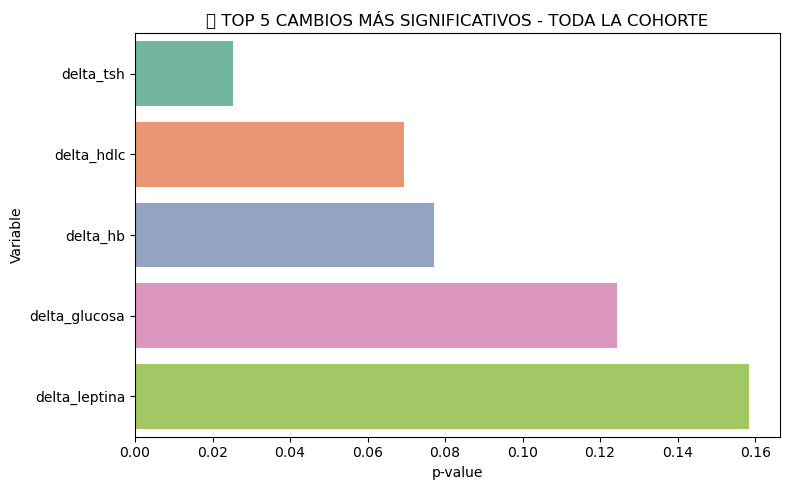

C:\Users\randy\AppData\Local\Temp\ipykernel_5644\1552173487.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top5, y='variable', x='p_value', palette='Set2')
C:\Users\randy\AppData\Local\Temp\ipykernel_5644\1552173487.py:15: UserWarning: Glyph 129382 (\N{BROCCOLI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\randy\.conda\envs\pit\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 129382 (\N{BROCCOLI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


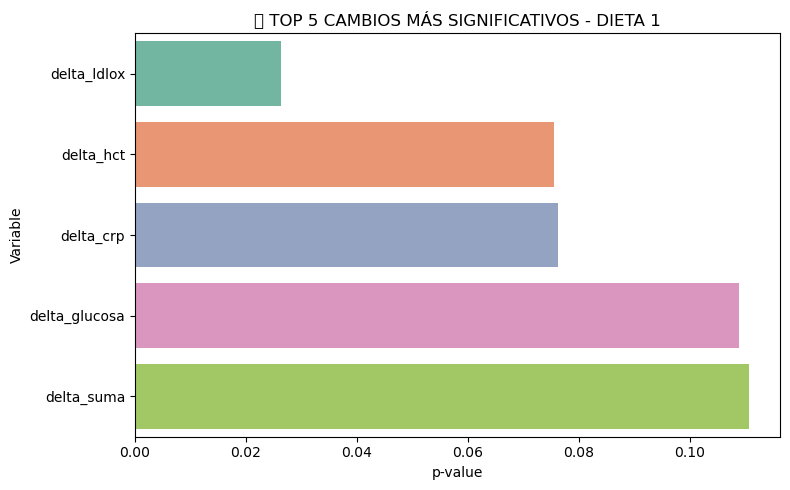

C:\Users\randy\AppData\Local\Temp\ipykernel_5644\1552173487.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top5, y='variable', x='p_value', palette='Set2')
C:\Users\randy\AppData\Local\Temp\ipykernel_5644\1552173487.py:15: UserWarning: Glyph 127831 (\N{POULTRY LEG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\randy\.conda\envs\pit\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127831 (\N{POULTRY LEG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


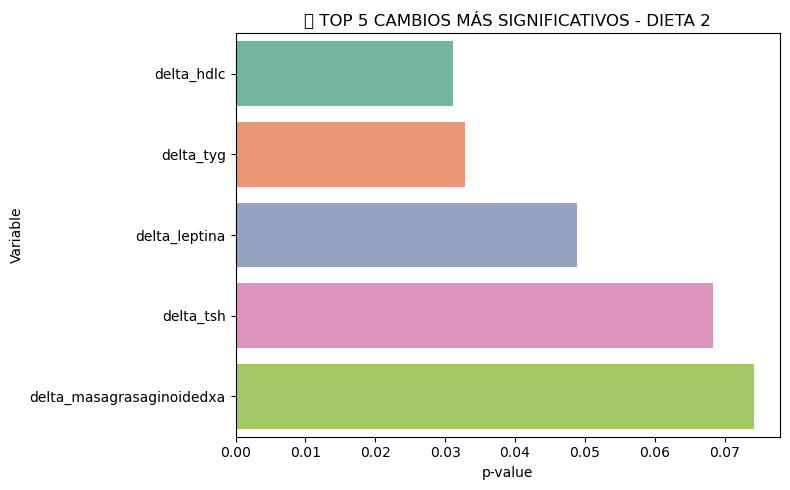

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

def barplot_top5(df_resultados, titulo):
    # Ordenar por p_value y tomar top 5
    top5 = df_resultados.sort_values(by='p_value').head(5).copy()
    top5 = top5.sort_values(by='p_value', ascending=True)

    # Crear el gráfico
    plt.figure(figsize=(8, 5))
    sns.barplot(data=top5, y='variable', x='p_value', palette='Set2')
    plt.xlabel('p-value')
    plt.ylabel('Variable')
    plt.title(titulo)
    plt.tight_layout()
    plt.show()

# Barplots separados
barplot_top5(df_resultados_delta_total, "🎯 TOP 5 CAMBIOS MÁS SIGNIFICATIVOS - TODA LA COHORTE")
barplot_top5(df_resultados_delta_dieta1, "🥦 TOP 5 CAMBIOS MÁS SIGNIFICATIVOS - DIETA 1")
barplot_top5(df_resultados_delta_dieta2, "🍗 TOP 5 CAMBIOS MÁS SIGNIFICATIVOS - DIETA 2")



### Boxplots

C:\Users\randy\AppData\Local\Temp\ipykernel_5644\768319483.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_cambios_base, x='cluster', y=var, palette='Set2')


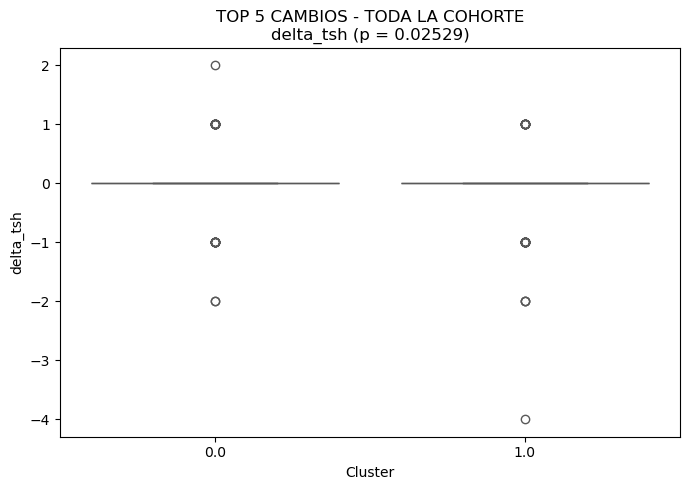

C:\Users\randy\AppData\Local\Temp\ipykernel_5644\768319483.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_cambios_base, x='cluster', y=var, palette='Set2')


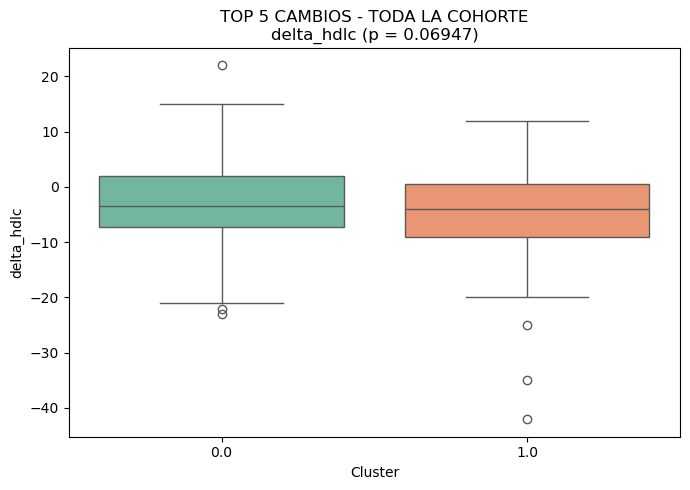

C:\Users\randy\AppData\Local\Temp\ipykernel_5644\768319483.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_cambios_base, x='cluster', y=var, palette='Set2')


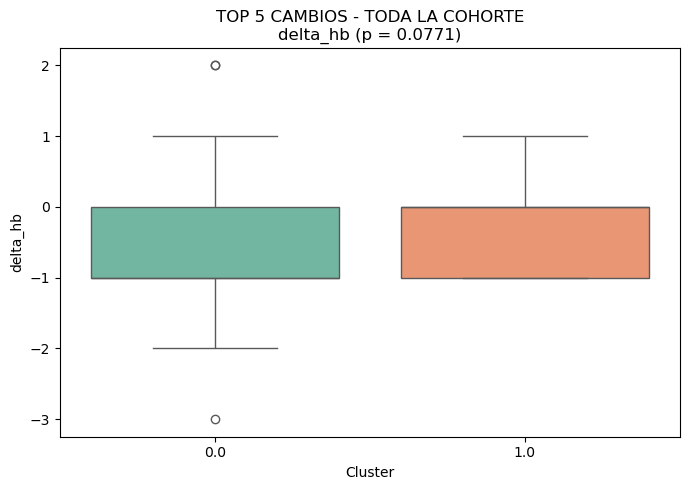

C:\Users\randy\AppData\Local\Temp\ipykernel_5644\768319483.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_cambios_base, x='cluster', y=var, palette='Set2')


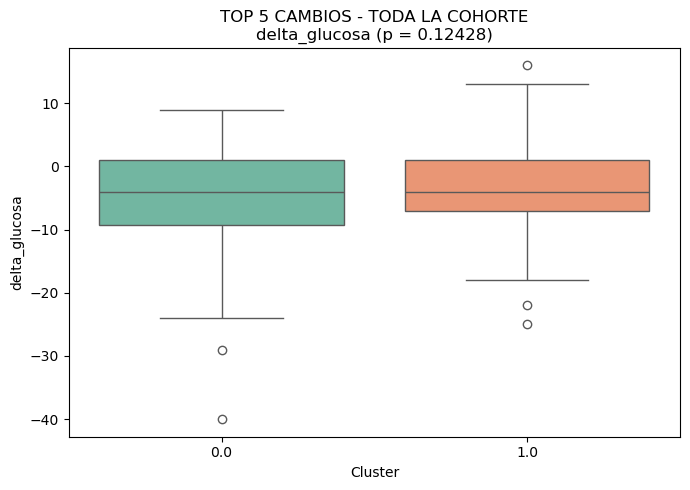

C:\Users\randy\AppData\Local\Temp\ipykernel_5644\768319483.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_cambios_base, x='cluster', y=var, palette='Set2')


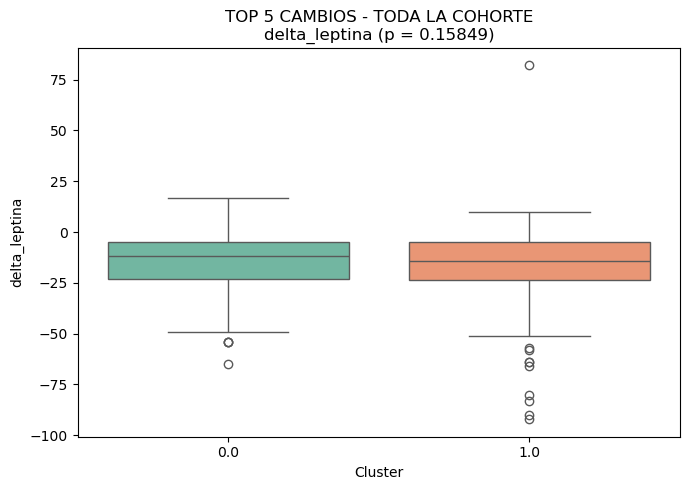

C:\Users\randy\AppData\Local\Temp\ipykernel_5644\768319483.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_cambios_base, x='cluster', y=var, palette='Set2')


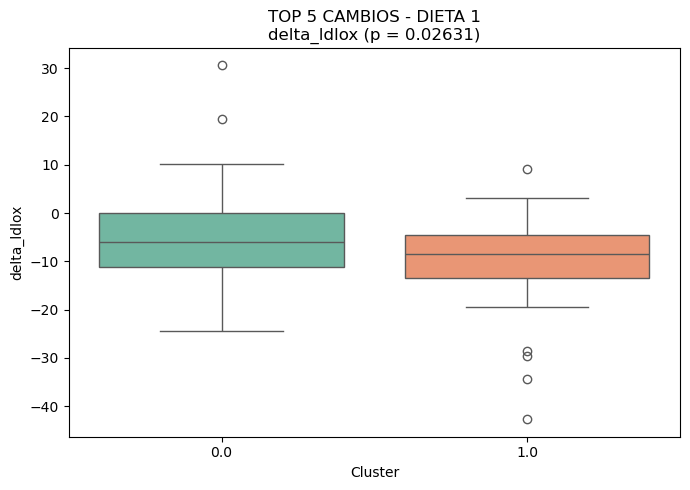

C:\Users\randy\AppData\Local\Temp\ipykernel_5644\768319483.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_cambios_base, x='cluster', y=var, palette='Set2')


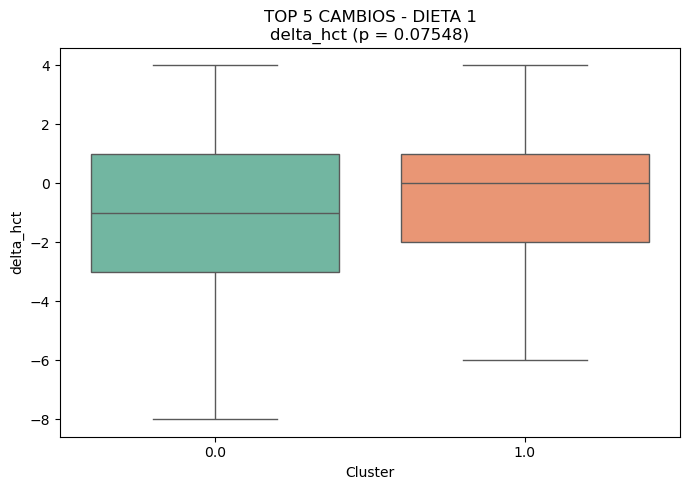

C:\Users\randy\AppData\Local\Temp\ipykernel_5644\768319483.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_cambios_base, x='cluster', y=var, palette='Set2')


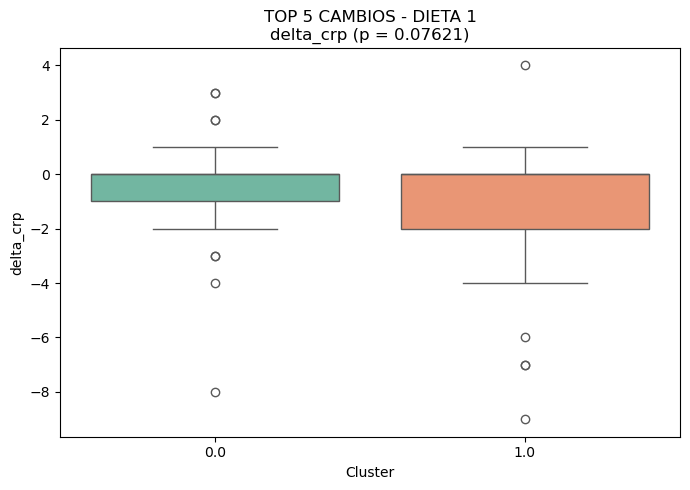

C:\Users\randy\AppData\Local\Temp\ipykernel_5644\768319483.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_cambios_base, x='cluster', y=var, palette='Set2')


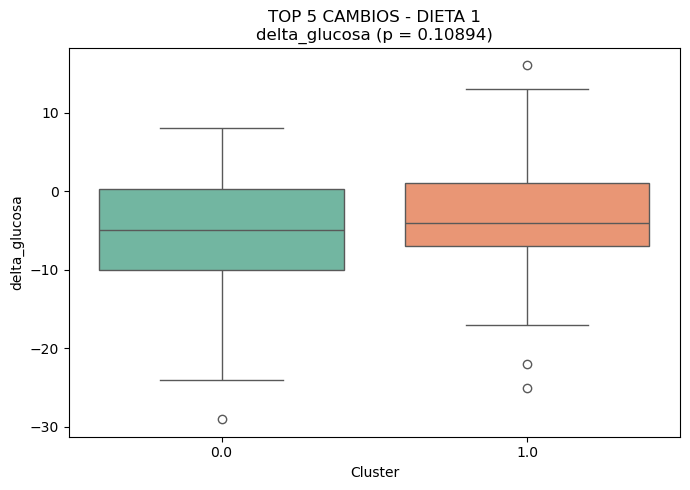

C:\Users\randy\AppData\Local\Temp\ipykernel_5644\768319483.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_cambios_base, x='cluster', y=var, palette='Set2')


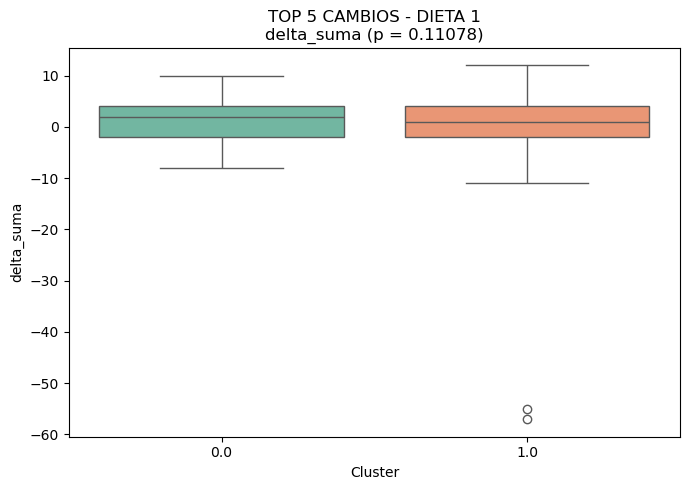

C:\Users\randy\AppData\Local\Temp\ipykernel_5644\768319483.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_cambios_base, x='cluster', y=var, palette='Set2')


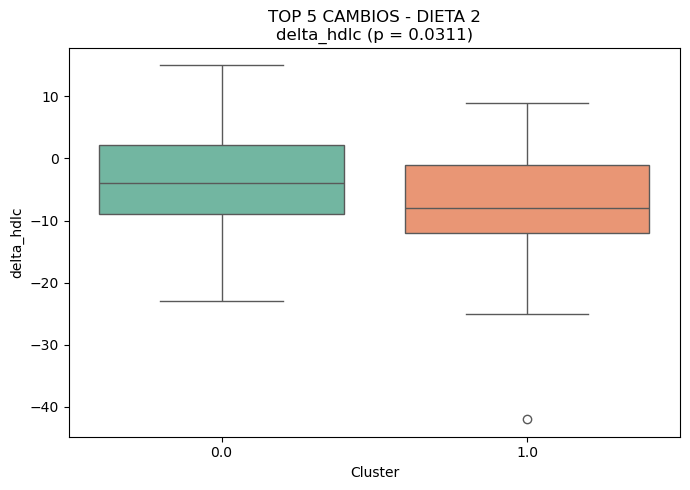

C:\Users\randy\AppData\Local\Temp\ipykernel_5644\768319483.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_cambios_base, x='cluster', y=var, palette='Set2')


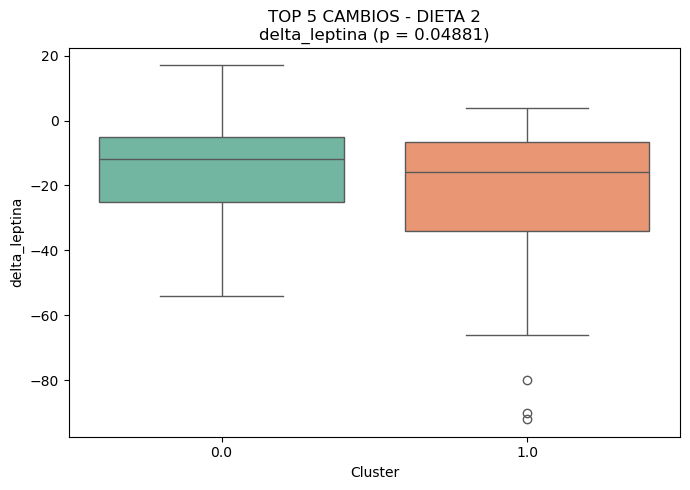

C:\Users\randy\AppData\Local\Temp\ipykernel_5644\768319483.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_cambios_base, x='cluster', y=var, palette='Set2')


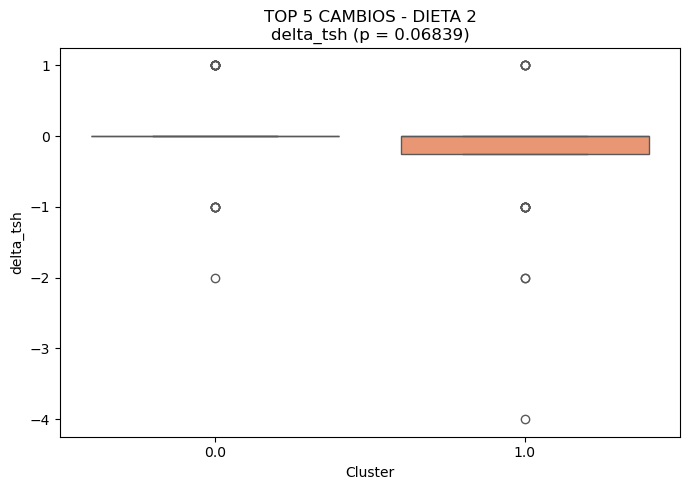

C:\Users\randy\AppData\Local\Temp\ipykernel_5644\768319483.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_cambios_base, x='cluster', y=var, palette='Set2')


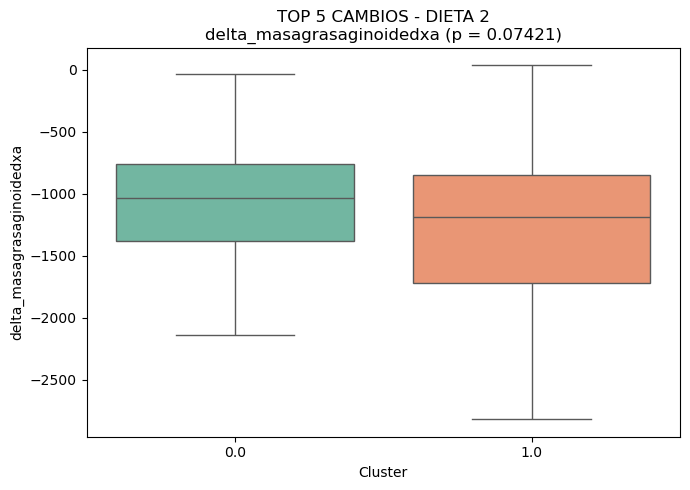

C:\Users\randy\AppData\Local\Temp\ipykernel_5644\768319483.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_cambios_base, x='cluster', y=var, palette='Set2')


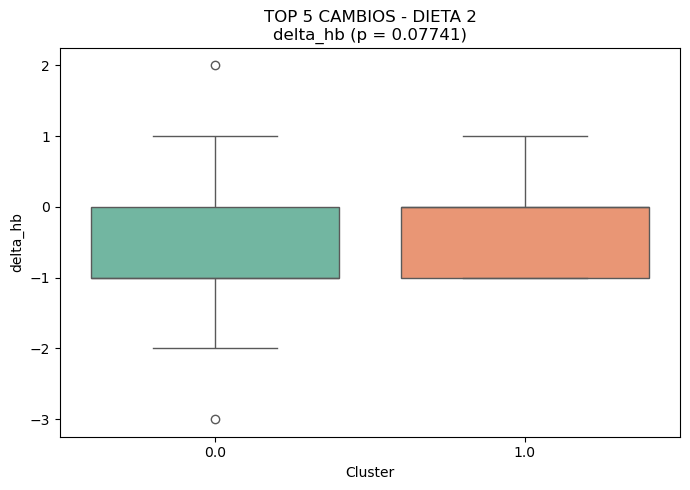

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

# Función para graficar top 5 variables desde un DataFrame de resultados
def graficar_top5(df_resultados, df_cambios_base, titulo):
    top_vars = df_resultados.sort_values(by='p_value').head(5)['variable'].tolist()

    for var in top_vars:
        plt.figure(figsize=(7, 5))
        sns.boxplot(data=df_cambios_base, x='cluster', y=var, palette='Set2')
        p_val = df_resultados[df_resultados['variable'] == var]['p_value'].values[0]
        plt.title(f"{titulo}\n{var} (p = {p_val})")
        plt.xlabel("Cluster")
        plt.ylabel(var)
        plt.tight_layout()
        plt.show()

# Llamadas para cada grupo
graficar_top5(df_resultados_delta_total, df_cambios_filtrado, "TOP 5 CAMBIOS - TODA LA COHORTE")
graficar_top5(df_resultados_delta_dieta1, df_cambios_filtrado[df_cambios_filtrado['dieta'] == 0], "TOP 5 CAMBIOS - DIETA 1")
graficar_top5(df_resultados_delta_dieta2, df_cambios_filtrado[df_cambios_filtrado['dieta'] == 1], "TOP 5 CAMBIOS - DIETA 2")


## 6.7 Preguntas ejemplo

### Pregunta 1
En V1, ¿era el peso corporal del cluster 1 diferente al del cluster 2?
Interpretación: No hay diferencias significativas en el peso inicial entre los dos clusters. Ambos grupos tenían un peso medio muy similar en el momento basal.

In [52]:
# PREGUNTA 1: ¿Diferencia de peso en V1 entre clusters?

from scipy.stats import ks_2samp, ttest_ind, mannwhitneyu

# Filtrar filas válidas
df_v1_peso = df_clinico_microbiota_v1.dropna(subset=['peso1', 'cluster']).copy()
df_v1_peso['cluster'] = df_v1_peso['cluster'].astype(int)

# Separar por cluster
peso_0 = df_v1_peso[df_v1_peso['cluster'] == 0]['peso1']
peso_1 = df_v1_peso[df_v1_peso['cluster'] == 1]['peso1']

# Test de normalidad para ver qué prueba usar
ks_peso = ks_2samp(peso_0, peso_1).pvalue

if ks_peso > 0.05:
    test_name = "t-test"
    p_valor = ttest_ind(peso_0, peso_1, equal_var=False).pvalue
else:
    test_name = "Mann-Whitney"
    p_valor = mannwhitneyu(peso_0, peso_1, alternative='two-sided').pvalue

print("📌 Peso en V1 por cluster")
print(f"Test usado: {test_name}")
print(f"p-value: {p_valor:.5f}")
print(f"Media cluster 0: {peso_0.mean():.2f}")
print(f"Media cluster 1: {peso_1.mean():.2f}")


📌 Peso en V1 por cluster
Test usado: t-test
p-value: 0.73290
Media cluster 0: 86.86
Media cluster 1: 87.44


### Pregunta 2
El cambio de peso corporal entre V1 y V3 en la población total, ¿fue diferente entre el cluster 1 y el cluster 2?
Interpretación: Tampoco se observan diferencias significativas entre los clusters en la evolución del peso durante el estudio, considerando a toda la cohorte.

In [53]:
# PREGUNTA 2: Diferencia en el cambio de peso (V3 - V1) en toda la cohorte

df_delta_total = df_cambios_filtrado.dropna(subset=['delta_peso', 'cluster']).copy()
df_delta_total['cluster'] = df_delta_total['cluster'].astype(int)

peso0 = df_delta_total[df_delta_total['cluster'] == 0]['delta_peso']
peso1 = df_delta_total[df_delta_total['cluster'] == 1]['delta_peso']

ks_p = ks_2samp(peso0, peso1).pvalue

if ks_p > 0.05:
    test = "t-test"
    pval = ttest_ind(peso0, peso1, equal_var=False).pvalue
else:
    test = "Mann-Whitney"
    pval = mannwhitneyu(peso0, peso1, alternative='two-sided').pvalue

print("📌 Cambio de peso en TODA LA COHORTE")
print(f"Test usado: {test}")
print(f"p-value: {pval:.5f}")
print(f"Media cluster 0: {peso0.mean():.2f}")
print(f"Media cluster 1: {peso1.mean():.2f}")


📌 Cambio de peso en TODA LA COHORTE
Test usado: t-test
p-value: 0.70699
Media cluster 0: -8.35
Media cluster 1: -8.55


### Pregunta 3
El cambio de peso corporal de los que siguieron la dieta 1, ¿fue diferente entre el cluster 1 y el cluster 2?
Interpretación: En los individuos asignados a la dieta 1, el cambio de peso fue muy similar entre ambos clusters. No hay diferencias estadísticamente significativas.

In [54]:
# PREGUNTA 3: Diferencia en el cambio de peso en dieta 1

df_d1 = df_cambios_filtrado[(df_cambios_filtrado['dieta'] == 0) & df_cambios_filtrado['delta_peso'].notna() & df_cambios_filtrado['cluster'].notna()].copy()
df_d1['cluster'] = df_d1['cluster'].astype(int)

p0 = df_d1[df_d1['cluster'] == 0]['delta_peso']
p1 = df_d1[df_d1['cluster'] == 1]['delta_peso']

ks_p = ks_2samp(p0, p1).pvalue

if ks_p > 0.05:
    test = "t-test"
    pval = ttest_ind(p0, p1, equal_var=False).pvalue
else:
    test = "Mann-Whitney"
    pval = mannwhitneyu(p0, p1, alternative='two-sided').pvalue

print("📌 Cambio de peso en DIETA 1")
print(f"Test usado: {test}")
print(f"p-value: {pval:.5f}")
print(f"Media cluster 0: {p0.mean():.2f}")
print(f"Media cluster 1: {p1.mean():.2f}")


📌 Cambio de peso en DIETA 1
Test usado: t-test
p-value: 0.89308
Media cluster 0: -8.35
Media cluster 1: -8.23


### Pregunta 4
El cambio de peso corporal de los que siguieron la dieta 2, ¿fue diferente entre el cluster 1 y el cluster 2?Interpretación: Tampoco hay diferencias significativas entre clusters dentro del grupo que siguió la dieta 2.

In [55]:
# PREGUNTA 4: Diferencia en el cambio de peso en dieta 2

df_d2 = df_cambios_filtrado[(df_cambios_filtrado['dieta'] == 1) & df_cambios_filtrado['delta_peso'].notna() & df_cambios_filtrado['cluster'].notna()].copy()
df_d2['cluster'] = df_d2['cluster'].astype(int)

p0 = df_d2[df_d2['cluster'] == 0]['delta_peso']
p1 = df_d2[df_d2['cluster'] == 1]['delta_peso']

ks_p = ks_2samp(p0, p1).pvalue

if ks_p > 0.05:
    test = "t-test"
    pval = ttest_ind(p0, p1, equal_var=False).pvalue
else:
    test = "Mann-Whitney"
    pval = mannwhitneyu(p0, p1, alternative='two-sided').pvalue

print("📌 Cambio de peso en DIETA 2")
print(f"Test usado: {test}")
print(f"p-value: {pval:.5f}")
print(f"Media cluster 0: {p0.mean():.2f}")
print(f"Media cluster 1: {p1.mean():.2f}")


📌 Cambio de peso en DIETA 2
Test usado: t-test
p-value: 0.41273
Media cluster 0: -8.34
Media cluster 1: -8.96


### Pregunta 5
¿Hay diferencia significativa de peso de V3 a V1?Interpretación: Sí, el peso ha disminuido de forma muy significativa entre el inicio (V1) y el final (V3) del estudio. El peso medio ha bajado de 87.55 kg a 79.21 kg, con un cambio medio de -8.34 kg. Esta reducción es global, independiente del cluster o dieta.

In [59]:
from scipy.stats import ttest_rel, wilcoxon

# Filtrar sujetos con ambos pesos disponibles
df_peso = df_clinico_microbiota_v1[['id', 'peso1']].merge(
    df_clinico_microbiota_v3[['id', 'peso3']], on='id', how='inner'
).dropna()

peso_v1 = df_peso['peso1']
peso_v3 = df_peso['peso3']
delta = peso_v3 - peso_v1

# Ver si las diferencias siguen una distribución normal
ks_p = ks_2samp(peso_v3, peso_v1).pvalue

if ks_p > 0.05:
    test = "t-test pareado"
    pval = ttest_rel(peso_v3, peso_v1).pvalue
else:
    test = "Wilcoxon"
    pval = wilcoxon(peso_v3, peso_v1).pvalue

print("📌 ¿Hay diferencia de peso entre V3 y V1?")
print(f"Test usado: {test}")
print(f"p-value: {pval:.100f}")
print(f"Peso medio en V1: {peso_v1.mean():.2f}")
print(f"Peso medio en V3: {peso_v3.mean():.2f}")
print(f"Media del cambio (V3 - V1): {delta.mean():.2f}")


📌 ¿Hay diferencia de peso entre V3 y V1?
Test usado: Wilcoxon
p-value: 0.0000000000000000000000000000000000000022063154301788666549620208624164761399040252460199931588324661
Peso medio en V1: 87.55
Peso medio en V3: 79.21
Media del cambio (V3 - V1): -8.34


## 🧪 Análisis de diferencias en cambios (V3-V1) entre clústeres

A continuación se analizan los resultados obtenidos tras comparar los cambios en variables clínicas entre los dos clústeres de microbiota, tanto en la cohorte completa como separados por dieta, conforme a lo indicado por Fermín.

---

### ✅ 1. Cohorte completa (sin dividir por dieta)
**Top 5 variables con mayor diferencia significativa entre clústeres:**

| Variable        | p-value  | Media Cluster 0 | Media Cluster 1 | Interpretación |
|----------------|----------|------------------|------------------|----------------|
| `delta_tsh`    | 0.025    | 0.04             | -0.18            | Disminución mayor de TSH en el clúster 1. Puede indicar una modulación distinta del eje tiroides. |
| `delta_hdlc`   | 0.069    | -2.68            | -4.75            | HDL bajó más en el clúster 1 → indicador desfavorable a nivel cardiovascular. |
| `delta_hb`     | 0.077    | -0.40            | -0.21            | Leve bajada de hemoglobina más pronunciada en clúster 0. |
| `delta_glucosa`| 0.124    | -4.95            | -3.30            | Ambos mejoran, pero el clúster 0 lo hace en mayor medida. |
| `delta_leptina`| 0.158    | -14.99           | -18.91           | Mayor descenso en leptina en clúster 1 → posible mayor pérdida de grasa o mayor sensibilidad. |

**🧾 Conclusión:** El clúster 1 muestra una respuesta metabólica más marcada en varias variables hormonales y metabólicas.

---

### ✅ 2. Dieta 1
**Top 5 variables con mayor diferencia significativa entre clústeres:**

| Variable        | p-value  | Media Cluster 0 | Media Cluster 1 | Interpretación |
|----------------|----------|------------------|------------------|----------------|
| `delta_ldlox`  | 0.026    | -5.04            | -9.97            | Reducción más intensa de LDL oxidado en clúster 1 → mejoría cardiovascular. |
| `delta_hct`    | 0.075    | -1.33            | -0.31            | Ligera bajada del hematocrito, más en clúster 0. |
| `delta_crp`    | 0.076    | -0.32            | -1.07            | Reducción más pronunciada de la inflamación en clúster 1 (PCR). |
| `delta_glucosa`| 0.108    | -5.72            | -3.05            | Mayor mejoría glucémica en clúster 0. |
| `delta_suma`   | 0.110    | 1.46             | -1.38            | Mejora en cronotipo (matutinidad) más marcada en clúster 0. |

**🧾 Conclusión:** En dieta 1, el clúster 1 mejora inflamación y perfil lipídico; el clúster 0 mejora parámetros glucémicos y conductuales.

---

### ✅ 3. Dieta 2
**Top 5 variables con mayor diferencia significativa entre clústeres:**

| Variable                    | p-value  | Media Cluster 0 | Media Cluster 1 | Interpretación |
|----------------------------|----------|------------------|------------------|----------------|
| `delta_hdlc`               | 0.031    | -3.50            | -7.11            | Descenso de HDL más marcado en clúster 1 (no favorable). |
| `delta_tyg`                | 0.032    | 0.03             | -0.16            | Mejoría del índice TYG en clúster 1. |
| `delta_leptina`            | 0.048    | -15.47           | -23.73           | Mayor descenso de leptina en clúster 1 → indicativo de pérdida grasa. |
| `delta_tsh`                | 0.068    | 0.03             | -0.25            | Disminución mayor de TSH en clúster 1. |
| `delta_masagrasaginoidedxa`| 0.074    | -1057.44         | -1264.67         | Mayor pérdida de grasa ginecoide en clúster 1. |

**🧾 Conclusión:** En dieta 2, el clúster 1 muestra una mayor pérdida de grasa y una mejor respuesta en indicadores hormonales/metabólicos.

---

### 🧠 Conclusión global
- El **clúster 1** tiende a mostrar **respuestas más pronunciadas** en indicadores metabólicos clave (leptina, TSH, glucosa, inflamación).
- Hay una clara **interacción entre dieta y microbiota**: la dieta no impacta igual dependiendo del microbiotipo del sujeto.
- Los resultados sugieren que la **composición de la microbiota podría modular la eficacia de la intervención dietética**, especialmente en términos de pérdida de grasa y mejora de parámetros inflamatorios.

